In [97]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import mplcursors
import statsmodels.api as sm
import numpy as np

In [13]:
data_CO2 = pd.read_csv("CO2-emissions-by-sector.csv")
data_CH4 = pd.read_csv("CH4-emissions-by-sector.csv")
data_N2O = pd.read_csv("N2O-emissions-by-sector.csv")
data_Fgases = pd.read_csv("Fgases-emissions-by-sector.csv")
data_GHG = pd.read_csv("GHG-emissions-by-sector.csv")

In [14]:
import pandas as pd
import plotly.express as px

fig = px.line(data_CO2, x='Year', y=data_CO2.columns[1:-1])
fig.update_layout(
    title='Emissions CO2 par secteurs',
    legend_title_text='Secteurs',
    legend=dict(
        x=0,  # Position horizontale de la légende (0 signifie à gauche)
        y=-0.2,  # Position verticale de la légende (-0.2 signifie en dessous de l'axe des abscisses)
        orientation='h'  # Orientation horizontale de la légende
    )
)

fig.update_yaxes(title_text='t CO2 / year', title_standoff=30)
fig.update_layout(
    yaxis=dict(
        range=[data_CO2.columns[1:-1].min(), data_CO2.columns[1:-1].max()] 
    )
)

# Activer le curseur interactif
fig.update_traces(hovertemplate='Année: %{x}<br>Émissions: %{y}')

# Afficher le graphique interactif
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Category', 'Agriculture', 'Buildings', 'Fuel Exploitation', 'Industrial Combustion', 'Power Industry', 'Processes', 'Transport', 'Waste', 'Total CO2/cap'] but received: Year

In [15]:
data_CO2 = data_CO2.rename(columns={'Category':'Year'})
data_CO2.head()

,Year,Agriculture,Buildings,Fuel Exploitation,Industrial Combustion,Power Industry,Processes,Transport,Waste,Total CO2/cap
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37


In [16]:
data_melted = data_CO2.melt(id_vars=['Year'], var_name='Sector', value_name='Value')
data_melted

,Year,Sector,Value
0,1970,Agriculture,49143283.00
1,1971,Agriculture,49143283.00
2,1972,Agriculture,49143283.00
3,1973,Agriculture,49143283.00
4,1974,Agriculture,49900345.00
...,...,...,...
472,2018,Total CO2/cap,4.96
473,2019,Total CO2/cap,4.90
474,2020,Total CO2/cap,4.61
475,2021,Total CO2/cap,4.84


In [17]:
data_land_temperatures = pd.read_csv("data_land_temperatures.csv", skiprows=4)
data_land_temperatures

,Year,Anomaly
0,185001,-0.95
1,185002,-0.25
2,185003,-0.47
3,185004,-0.43
4,185005,-0.45
...,...,...
2080,202305,1.19
2081,202306,1.37
2082,202307,1.41
2083,202308,1.66


In [18]:
data_land_temperatures['Year'] = data_land_temperatures['Year'].astype(str)
data_land_temperatures['Month'] = data_land_temperatures['Year'].str.slice(start = -2).astype(int)
data_land_temperatures['Year'] = data_land_temperatures['Year'].str.slice(stop=-2).astype(int)

data_land_temperatures = data_land_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_land_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [19]:
data_land_temperatures

,Year,Month,Anomaly
0,1850,1,-0.95
1,1850,2,-0.25
2,1850,3,-0.47
3,1850,4,-0.43
4,1850,5,-0.45
...,...,...,...
2080,2023,5,1.19
2081,2023,6,1.37
2082,2023,7,1.41
2083,2023,8,1.66


In [20]:
data_land_temperatures['Month'] = data_land_temperatures['Month'].replace({})

In [21]:
data_land_mean_temperatures = data_land_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_land_mean_temperatures = data_land_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_land_mean_temperatures

,Year,averageAnomaly
0,1850,-0.373333
1,1851,-0.246667
2,1852,-0.343333
3,1853,-0.336667
4,1854,-0.265833
...,...,...
169,2019,1.508333
170,2020,1.647500
171,2021,1.371667
172,2022,1.430000


<Axes: xlabel='Year'>

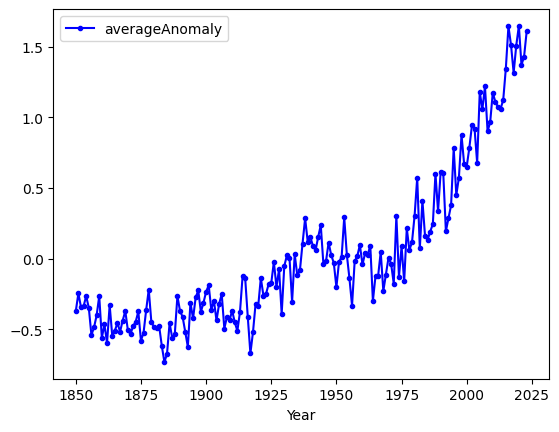

In [22]:
data_land_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [62]:
data_ocean_temperatures = pd.read_csv("data_ocean_temperatures.csv", skiprows=4)
data_ocean_temperatures

,Year,Anomaly
0,185001,-0.10
1,185002,-0.07
2,185003,-0.12
3,185004,-0.08
4,185005,-0.07
...,...,...
2080,202305,0.84
2081,202306,0.92
2082,202307,1.00
2083,202308,1.03


In [63]:
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].astype(str)
data_ocean_temperatures['Month'] = data_ocean_temperatures['Year'].str.slice(start = -2).astype(int)
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].str.slice(stop=-2).astype(int)

data_ocean_temperatures = data_ocean_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_ocean_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [65]:
data_ocean_mean_temperatures = data_ocean_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_ocean_mean_temperatures = data_ocean_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_ocean_mean_temperatures

,Year,averageAnomaly
0,1850,-0.058333
1,1851,0.003333
2,1852,0.027500
3,1853,0.009167
4,1854,-0.016667
...,...,...
169,2019,0.738333
170,2020,0.725000
171,2021,0.630833
172,2022,0.669167


<Axes: xlabel='Year'>

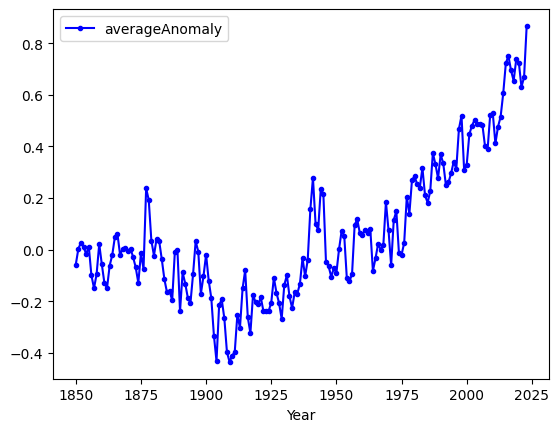

In [66]:
data_ocean_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [70]:
data_global_temperatures = pd.read_csv("global_land_ocean_temperatures.csv", skiprows=4)
data_global_temperatures

,Year,Anomaly
0,185001,-0.37
1,185002,-0.12
2,185003,-0.23
3,185004,-0.19
4,185005,-0.19
...,...,...
2080,202305,0.95
2081,202306,1.06
2082,202307,1.13
2083,202308,1.22


In [71]:
data_global_temperatures['Year'] = data_global_temperatures['Year'].astype(str)
data_global_temperatures['Month'] = data_global_temperatures['Year'].str.slice(start = -2).astype(int)
data_global_temperatures['Year'] = data_global_temperatures['Year'].str.slice(stop=-2).astype(int)

data_global_temperatures = data_global_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_global_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [73]:
data_global_mean_temperatures = data_global_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_global_mean_temperatures = data_global_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_global_mean_temperatures

,Year,averageAnomaly
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833


<Axes: xlabel='Year'>

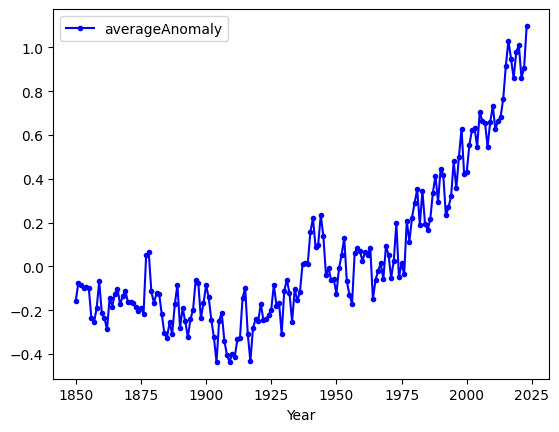

In [74]:
data_global_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [78]:
data_ocean_land_mean_temperatures = data_ocean_mean_temperatures.merge(data_land_mean_temperatures, on="Year", how="inner",suffixes=("-ocean","-land"))
data_ocean_land_mean_temperatures

,Year,averageAnomaly-ocean,averageAnomaly-land
0,1850,-0.058333,-0.373333
1,1851,0.003333,-0.246667
2,1852,0.027500,-0.343333
3,1853,0.009167,-0.336667
4,1854,-0.016667,-0.265833
...,...,...,...
169,2019,0.738333,1.508333
170,2020,0.725000,1.647500
171,2021,0.630833,1.371667
172,2022,0.669167,1.430000


In [87]:
data_mean_temperatures = data_ocean_land_mean_temperatures.merge(data_global_mean_temperatures, on="Year", how="inner")
data_mean_temperatures = data_mean_temperatures.rename(columns={'averageAnomaly':'averageAnomaly-global'})
data_mean_temperatures

,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
0,1850,-0.058333,-0.373333,-0.156667
1,1851,0.003333,-0.246667,-0.074167
2,1852,0.027500,-0.343333,-0.085833
3,1853,0.009167,-0.336667,-0.096667
4,1854,-0.016667,-0.265833,-0.091667
...,...,...,...,...
169,2019,0.738333,1.508333,0.978333
170,2020,0.725000,1.647500,1.010833
171,2021,0.630833,1.371667,0.860000
172,2022,0.669167,1.430000,0.905833


In [101]:
data_mean_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   174 non-null    int64  
 1   averageAnomaly-ocean   174 non-null    float64
 2   averageAnomaly-land    174 non-null    float64
 3   averageAnomaly-global  174 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.6 KB


In [23]:
data = pd.read_csv("FAOSTAT_data_en_10-21-2023.csv")
data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46729 entries, 0 to 46728
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       46729 non-null  object 
 1   Domain            46729 non-null  object 
 2   Area Code (M49)   46729 non-null  int64  
 3   Area              46729 non-null  object 
 4   Element Code      46729 non-null  int64  
 5   Element           46729 non-null  object 
 6   Item Code         46729 non-null  int64  
 7   Item              46729 non-null  object 
 8   Year Code         46729 non-null  int64  
 9   Year              46729 non-null  int64  
 10  Unit              46729 non-null  object 
 11  Value             46729 non-null  float64
 12  Flag              46729 non-null  object 
 13  Flag Description  46729 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 5.3+ MB


In [25]:
data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 No,7480.461,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1950,1950,1000 No,7286.991,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,1950,1950,1000 No,465.127,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 No,7571.537,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1951,1951,1000 No,7352.856,X,Figure from international organizations,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46724,OA,Annual population,716,Zimbabwe,551,Rural population,3010,Population - Est. & Proj.,2020,2020,1000 No,11980.005,X,Figure from international organizations,NaN
46725,OA,Annual population,716,Zimbabwe,561,Urban population,3010,Population - Est. & Proj.,2020,2020,1000 No,5700.460,X,Figure from international organizations,NaN
46726,OA,Annual population,716,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2021,2021,1000 No,15993.524,X,Figure from international organizations,NaN
46727,OA,Annual population,716,Zimbabwe,551,Rural population,3010,Population - Est. & Proj.,2021,2021,1000 No,12226.340,X,Figure from international organizations,NaN


In [26]:
columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item' ,'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
data = data.drop(columns=columns_to_drop)
data

,Area,Element,Year,Value
0,Afghanistan,Total Population - Both sexes,1950,7480.461
1,Afghanistan,Rural population,1950,7286.991
2,Afghanistan,Urban population,1950,465.127
3,Afghanistan,Total Population - Both sexes,1951,7571.537
4,Afghanistan,Rural population,1951,7352.856
...,...,...,...,...
46724,Zimbabwe,Rural population,2020,11980.005
46725,Zimbabwe,Urban population,2020,5700.460
46726,Zimbabwe,Total Population - Both sexes,2021,15993.524
46727,Zimbabwe,Rural population,2021,12226.340


In [27]:
grouped_df_world = data.groupby(['Year', 'Element'], as_index=False).sum()
grouped_df_world = grouped_df_world.drop(columns='Area')

grouped_df_world = grouped_df_world.pivot(index=['Year'], columns='Element', values='Value').reset_index()
grouped_df_world.columns.name = None
grouped_df_world = grouped_df_world.drop(columns='Total Population - Both sexes')
grouped_df_world['Total population'] = grouped_df_world['Urban population'] + grouped_df_world['Rural population']

grouped_df_world

,Year,Rural population,Urban population,Total population
0,1950,2280229.823,820258.014,3100487.837
1,1951,2314969.612,848615.115,3163584.727
2,1952,2346274.223,876864.771,3223138.994
3,1953,2374872.565,905829.315,3280701.880
4,1954,2401878.756,935690.068,3337568.824
...,...,...,...,...
67,2017,4007890.027,4983503.377,8991393.404
68,2018,3996201.638,5083419.009,9079620.647
69,2019,3983886.503,5182643.555,9166530.058
70,2020,3970976.303,5281071.704,9252048.007


In [28]:
data = data.pivot(index=['Area', 'Year'], columns='Element', values='Value').reset_index()

# Réinitialisez les noms de colonnes
data.columns.name = None
data

,Area,Year,Rural population,Total Population - Both sexes,Urban population
0,Afghanistan,1950,7286.991,7480.461,465.127
1,Afghanistan,1951,7352.856,7571.537,486.654
2,Afghanistan,1952,7425.363,7667.533,509.617
3,Afghanistan,1953,7504.561,7764.546,534.035
4,Afghanistan,1954,7590.370,7864.285,560.077
...,...,...,...,...,...
15610,Zimbabwe,2017,11201.138,14751.101,5328.766
15611,Zimbabwe,2018,11465.748,15052.184,5447.513
15612,Zimbabwe,2019,11725.970,15354.608,5571.525
15613,Zimbabwe,2020,11980.005,15669.666,5700.460


In [29]:
data = data.drop(columns=['Total Population - Both sexes'])
data['Total population'] = data['Rural population'] + data['Urban population']
data

,Area,Year,Rural population,Urban population,Total population
0,Afghanistan,1950,7286.991,465.127,7752.118
1,Afghanistan,1951,7352.856,486.654,7839.510
2,Afghanistan,1952,7425.363,509.617,7934.980
3,Afghanistan,1953,7504.561,534.035,8038.596
4,Afghanistan,1954,7590.370,560.077,8150.447
...,...,...,...,...,...
15610,Zimbabwe,2017,11201.138,5328.766,16529.904
15611,Zimbabwe,2018,11465.748,5447.513,16913.261
15612,Zimbabwe,2019,11725.970,5571.525,17297.495
15613,Zimbabwe,2020,11980.005,5700.460,17680.465


In [30]:
# Utilisez la méthode pivot pour remodeler la dataframe
pivot_df = data.pivot(index='Year', columns='Area')

# Réorganisez les colonnes du nouveau dataframe pour avoir le format souhaité
pivot_df = pivot_df.swaplevel(0, 1, axis=1)
pivot_df = pivot_df.sort_index(axis=1, level=0)

# Réinitialisez l'index
pivot_df.reset_index(inplace=True)

# Renommez les colonnes pour correspondre au format souhaité
pivot_df.columns = [f'{col} - {area}' if col != 'Year' else col for col, area in pivot_df.columns]


## Graphe de l'évolution des populations rurals et urbaines dans le monde

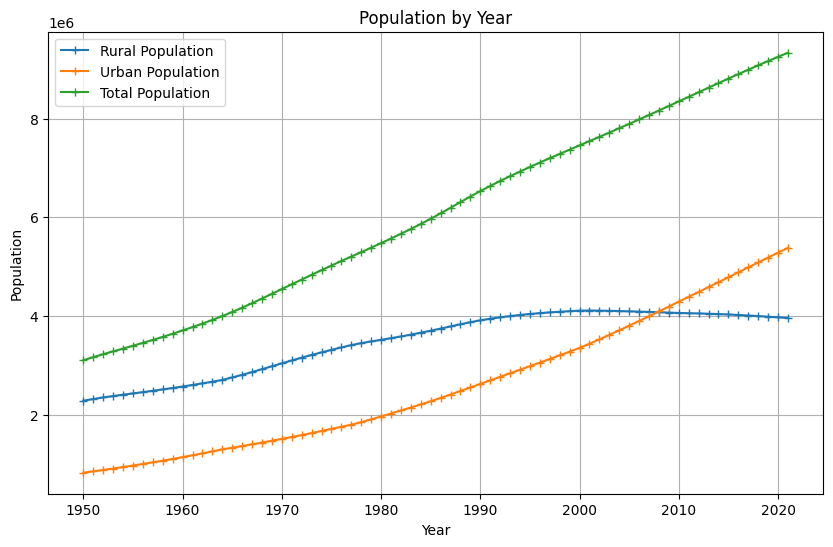

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_world['Year'], grouped_df_world['Rural population'], marker='+', label='Rural Population')
plt.plot(grouped_df_world['Year'], grouped_df_world['Urban population'], marker='+', label='Urban Population')
plt.plot(grouped_df_world['Year'], grouped_df_world['Total population'], marker='+', label='Total Population')

# Configuration du graphique
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

<Axes: xlabel='Year', ylabel='Urban population'>

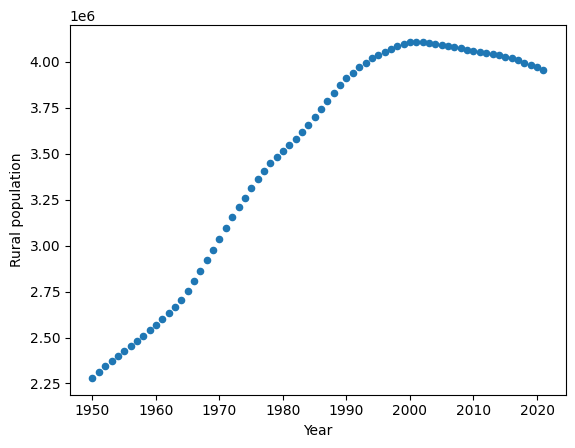

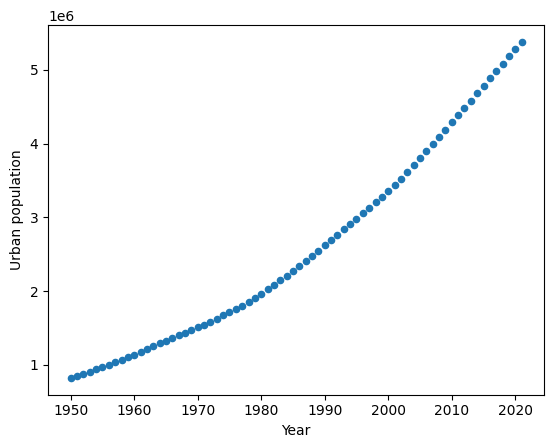

In [45]:
grouped_df_world.plot(kind='scatter',x='Year',y='Rural population')
grouped_df_world.plot(kind='scatter',x='Year',y='Urban population')

In [33]:
data_test = pd.read_csv('Emissions_Totals_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
data_test.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2030,Y2050
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170,1.5337,1.9389
1,2,'004,Afghanistan,5064,Crop Residues,7236,Indirect emissions (N2O),3050,FAO TIER 1,kilotonnes,...,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963,0.3451,0.4362
2,2,'004,Afghanistan,5064,Crop Residues,7230,Emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133,1.8788,2.3751
3,2,'004,Afghanistan,5064,Crop Residues,724313,Emissions (CO2eq) from N2O (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047
4,2,'004,Afghanistan,5064,Crop Residues,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047


In [34]:
data_test = data_test.drop(columns=[col for col in data_test.columns if 'Code' in col])
data_test = data_test.drop(columns=['Unit','Y2030','Y2050'])

In [35]:
data_test.head()

,Area,Item,Element,Source,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),FAO TIER 1,0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),FAO TIER 1,0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),FAO TIER 1,1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [36]:
# On supprime les lignes avec la valeur 'UNFCCC' dans la colonne 'Source'
data_test = data_test[data_test['Source'] != 'UNFCCC'].drop(columns=['Source'])

In [37]:
data_test.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,0.8783,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,0.1976,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,1.0759,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,285.1026,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,285.1026,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [38]:
melted_data = pd.melt(data_test, id_vars=['Area', 'Item', 'Element'], var_name='Year', value_name='Emissions')
melted_data['Category'] = melted_data[['Item', 'Element', 'Area']].apply(lambda x: ' - '.join(x), axis=1)
melted_data = melted_data.drop(columns=['Area','Item','Element'])

In [39]:
melted_data

,Year,Emissions,Category
0,Y1961,8.762000e-01,Crop Residues - Direct emissions (N2O) - Afgha...
1,Y1961,1.972000e-01,Crop Residues - Indirect emissions (N2O) - Afg...
2,Y1961,1.073400e+00,Crop Residues - Emissions (N2O) - Afghanistan
3,Y1961,2.844486e+02,Crop Residues - Emissions (CO2eq) from N2O (AR...
4,Y1961,2.844486e+02,Crop Residues - Emissions (CO2eq) (AR5) - Afgh...
...,...,...,...
3231175,Y2020,1.088919e+07,All sectors without LULUCF - Emissions (CO2) -...
3231176,Y2020,9.208261e+05,All sectors without LULUCF - Emissions (CO2eq)...
3231177,Y2020,1.825476e+06,All sectors without LULUCF - Emissions (CO2eq)...
3231178,Y2020,8.009744e+05,All sectors without LULUCF - Emissions (CO2eq)...


In [40]:
# Utilisez la méthode pivot pour obtenir la table pivot
pivot_table = melted_data.pivot(index='Year', columns='Category', values='Emissions')

# Réinitialisez l'index et donnez un nom à l'index et aux colonnes
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None

In [41]:
pivot_table.head()

,Year,AFOLU - Emissions (CH4) - Afghanistan,AFOLU - Emissions (CH4) - Africa,AFOLU - Emissions (CH4) - Albania,AFOLU - Emissions (CH4) - Algeria,AFOLU - Emissions (CH4) - American Samoa,AFOLU - Emissions (CH4) - Americas,AFOLU - Emissions (CH4) - Andorra,AFOLU - Emissions (CH4) - Angola,AFOLU - Emissions (CH4) - Anguilla,...,Waste - Emissions (N2O) - Venezuela (Bolivarian Republic of),Waste - Emissions (N2O) - Viet Nam,Waste - Emissions (N2O) - Western Africa,Waste - Emissions (N2O) - Western Asia,Waste - Emissions (N2O) - Western Europe,Waste - Emissions (N2O) - World,Waste - Emissions (N2O) - Yemen,Waste - Emissions (N2O) - Yugoslav SFR,Waste - Emissions (N2O) - Zambia,Waste - Emissions (N2O) - Zimbabwe
0,Y1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
pivot_table_world = pivot_table[[col for col in pivot_table.columns if 'World' in col]].fillna(0)
pivot_table_world.head()

,AFOLU - Emissions (CH4) - World,AFOLU - Emissions (CO2) - World,AFOLU - Emissions (CO2eq) (AR5) - World,AFOLU - Emissions (CO2eq) from CH4 (AR5) - World,AFOLU - Emissions (CO2eq) from N2O (AR5) - World,AFOLU - Emissions (N2O) - World,Agricultural Soils - Direct emissions (N2O) - World,Agricultural Soils - Emissions (CO2eq) (AR5) - World,Agricultural Soils - Emissions (CO2eq) from N2O (AR5) - World,Agricultural Soils - Emissions (N2O) - World,...,Synthetic Fertilizers - Emissions (CO2eq) (AR5) - World,Synthetic Fertilizers - Emissions (CO2eq) from N2O (AR5) - World,Synthetic Fertilizers - Emissions (N2O) - World,Synthetic Fertilizers - Indirect emissions (N2O) - World,Waste - Emissions (CH4) - World,Waste - Emissions (CO2) - World,Waste - Emissions (CO2eq) (AR5) - World,Waste - Emissions (CO2eq) from CH4 (AR5) - World,Waste - Emissions (CO2eq) from N2O (AR5) - World,Waste - Emissions (N2O) - World
0,0.0,0.0,0.0,0.0,0.0,0.0,1842.0933,633732.7012,633732.7012,2391.4442,...,63209.4457,63209.4457,238.5262,58.5064,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1898.1131,652980.5658,652980.5658,2464.0776,...,71332.5602,71332.5602,269.1795,66.0252,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1944.1626,668870.6275,668870.6275,2524.0401,...,80530.9187,80530.9187,303.8903,74.5391,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2006.3062,689803.5786,689803.5786,2603.0324,...,90245.8344,90245.8344,340.5503,83.5312,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2078.8808,714962.5279,714962.5279,2697.9718,...,104079.4644,104079.4644,392.7527,96.3356,0.0,0.0,0.0,0.0,0.0,0.0


## 4 - Régression dynamique

### Premier modèle de régression dynamique pour prédire les températures globales avec les données éxogènes ocean et land pour les températures

In [102]:
# Fit the model
data_mean_temperatures_2010 = data_mean_temperatures[data_mean_temperatures['Year']<2010]
endog = data_mean_temperatures_2010['averageAnomaly-global']
exog = sm.add_constant(data_mean_temperatures_2010[['averageAnomaly-ocean','averageAnomaly-land']])
exog['averageAnomaly-ocean2'] = data_mean_temperatures_2010['averageAnomaly-ocean']**2
exog['averageAnomaly-land2'] = data_mean_temperatures_2010['averageAnomaly-land']**2
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,3), seasonal_order=(1,0,1,7))
res = mod.fit(disp=False)
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:               averageAnomaly-global   No. Observations:                  160
Model:             SARIMAX(1, 0, 3)x(1, 0, [1], 7)   Log Likelihood                 881.274
Date:                             Wed, 01 Nov 2023   AIC                          -1738.548
Time:                                     23:20:40   BIC                          -1701.646
Sample:                                          0   HQIC                         -1723.563
                                             - 160                                         
Covariance Type:                               opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.395e-05      0.000      0.188      0.851      -0.000       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
# Créez une liste de combinaisons de paramètres à essayer
# Vous pouvez spécifier une plage de valeurs pour p, d, q, P, D, Q, et s
p_values = [1, 2, 3]
d_values = [0, 1]
q_values = [1, 2, 3]
P_values = [1, 2]
D_values = [0, 1]
Q_values = [1, 2]
s_values = [7]  # Saison

best_aic = float("inf")
best_order = ()
best_seasonal_order = ()
best_model = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
                                res = mod.fit(disp=False)
                                aic = res.aic
                                if aic < best_aic:
                                    best_aic = aic
                                    best_order = (p, d, q)
                                    best_seasonal_order = (P, D, Q, s)
                                    best_model = res
                            except Exception as e:
                                continue

print(f"Best AIC: {best_aic}")
print(f"Best order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")

# Le meilleur modèle est stocké dans best_model et peut être utilisé pour les prévisions.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible st

Best AIC: -1898.5369656101998
Best order: (1, 0, 1)
Best seasonal order: (1, 0, 1, 7)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [103]:
np.sum(np.abs(res.resid.values)**2)

0.0001539990618146985

In [119]:



data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year']>=2010]
date_index = data_mean_temperatures_prediction['Year']


exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2','averageAnomaly-land','averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

In [122]:
# Supposons que vous ayez déjà ajusté le modèle SARIMAX comme vous l'avez décrit dans votre code précédent.

# Préparez vos données futures (exogènes) pour les années 2010 à 2023
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year'] >= 2010]

date_index = data_mean_temperatures_prediction['Year']

exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2', 'averageAnomaly-land', 'averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

# Utilisez le modèle pour effectuer des prévisions sur ces données futures
forecast = res.get_forecast(steps=14, exog=exog_future)

# Les prévisions sont stockées dans l'objet "forecast". Vous pouvez extraire les prévisions et les intervalles de confiance ainsi :
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vous pouvez ensuite créer un DataFrame pour stocker les prévisions, les dates et les intervalles de confiance, par exemple.
forecast_df = pd.DataFrame({
    'Date': date_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci['lower averageAnomaly-global'],
    'Upper_CI': forecast_ci['upper averageAnomaly-global']
})

# Vous avez maintenant un DataFrame "forecast_df" contenant les prévisions de températures globales pour les années 2010 à 2023.


MissingDataError: exog contains inf or nans

In [128]:
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year'] >= 2010]

date_index = data_mean_temperatures_prediction['Year']

exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2', 'averageAnomaly-land', 'averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

data_mean_temperatures_prediction


,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
160,2010,0.528333,1.175833,0.730833
161,2011,0.411667,1.107500,0.627500
162,2012,0.476667,1.075000,0.662500
163,2013,0.515000,1.061667,0.683333
164,2014,0.605833,1.123333,0.765000
165,2015,0.722500,1.345000,0.915000
166,2016,0.751667,1.645833,1.030833
167,2017,0.695000,1.510833,0.947500
168,2018,0.655000,1.315000,0.859167
169,2019,0.738333,1.508333,0.978333


In [131]:
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year']>2009]
endog_future = data_mean_temperatures_prediction['averageAnomaly-global']
exog_future = sm.add_constant(data_mean_temperatures_prediction[['averageAnomaly-ocean','averageAnomaly-land']])
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

In [132]:
exog_future

,const,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-ocean2,averageAnomaly-land2
160,1.0,0.528333,1.175833,0.279136,1.382584
161,1.0,0.411667,1.107500,0.169469,1.226556
162,1.0,0.476667,1.075000,0.227211,1.155625
163,1.0,0.515000,1.061667,0.265225,1.127136
164,1.0,0.605833,1.123333,0.367034,1.261878
165,1.0,0.722500,1.345000,0.522006,1.809025
166,1.0,0.751667,1.645833,0.565003,2.708767
167,1.0,0.695000,1.510833,0.483025,2.282617
168,1.0,0.655000,1.315000,0.429025,1.729225
169,1.0,0.738333,1.508333,0.545136,2.275069


In [133]:
forecast = res.get_forecast(steps=14, exog=exog_future)

# Les prévisions sont stockées dans l'objet "forecast". Vous pouvez extraire les prévisions et les intervalles de confiance ainsi :
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vous pouvez ensuite créer un DataFrame pour stocker les prévisions, les dates et les intervalles de confiance, par exemple.
forecast_df = pd.DataFrame({
    'Date': date_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci['lower averageAnomaly-global'],
    'Upper_CI': forecast_ci['upper averageAnomaly-global']
})

In [135]:
forecast_df

,Date,Forecast,Lower_CI,Upper_CI
160,2010,0.729526,0.727609,0.731443
161,2011,0.627977,0.626060,0.629895
162,2012,0.662547,0.660629,0.664465
163,2013,0.684716,0.682797,0.686634
164,2014,0.766272,0.764354,0.768191
165,2015,0.915446,0.913528,0.917365
166,2016,1.029448,1.027530,1.031367
167,2017,0.948391,0.946470,0.950312
168,2018,0.859812,0.857891,0.861733
169,2019,0.977278,0.975357,0.979199


<Axes: xlabel='Date'>

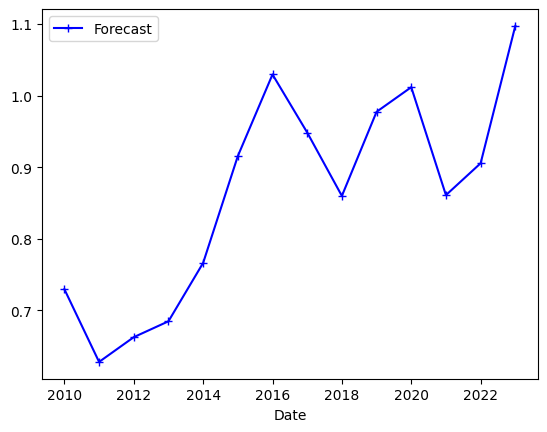

In [137]:
forecast_df.plot(x='Date', y='Forecast', kind='line', marker='+', linestyle='-', color='b')

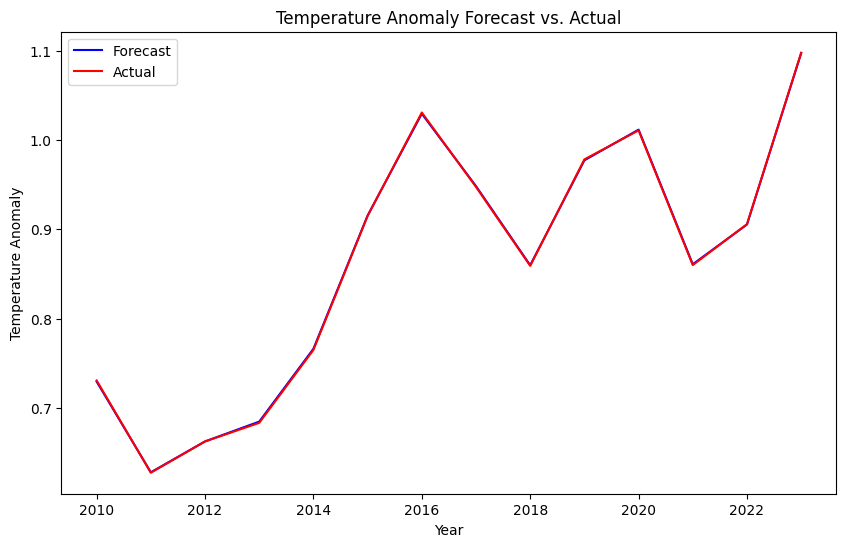

In [138]:
forecast_dates = forecast_df['Date']
forecast_values = forecast_df['Forecast']
actual_dates = data_mean_temperatures[data_mean_temperatures['Year']>2009]['Year']
actual_values = data_mean_temperatures[data_mean_temperatures['Year']>2009]['averageAnomaly-global']

# Créez un graphique pour superposer les deux séries temporelles
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast_values, label='Forecast', color='blue')
plt.plot(actual_dates, actual_values, label='Actual', color='red')

# Ajoutez des étiquettes, une légende, un titre, etc.
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Forecast vs. Actual')
plt.legend()

# Affichez le graphique
plt.show()